#**Assignment 4: Watershed and Segmentation Evaluation**

By Ana María Garzón

Computer Vision, Universidad del Rosario

March 2023



In [1]:
# Libraries
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
import numpy as np

In [2]:
# Images
img1 = cv2.imread('Image_1.png')
img2 = cv2.imread('Image_2.jpg')
img1_mask = cv2.imread('Image_1_mask.jpg')
img2_mask = cv2.imread('Image_2_mask.jpg')

# RGB Images
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Gray Images
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

**MORPHOLOGICAL WATERSHED SEGMENTATION**

A) Perform color segmentation of all objects in image 1 using the segmentation mask generated by the morphological Watershed method. Use OTSU thresholding and morphological filters for image preprocessing.

**Development:**

We will start by showing the original image in grayscale




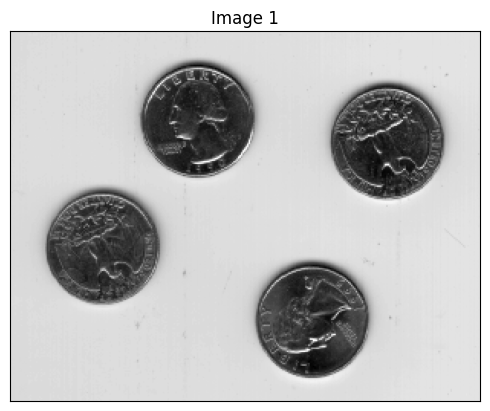

In [3]:
plt.figure() # crear figura
plt.title('Image 1') # título
plt.imshow(img1_gray, cmap = 'gray') # mostrar imagen
plt.xticks([]), plt.yticks([]) # eliminar ejes
plt.show() # mostrar imagen

Next we will perform a thresholding with OTSU of the previous image

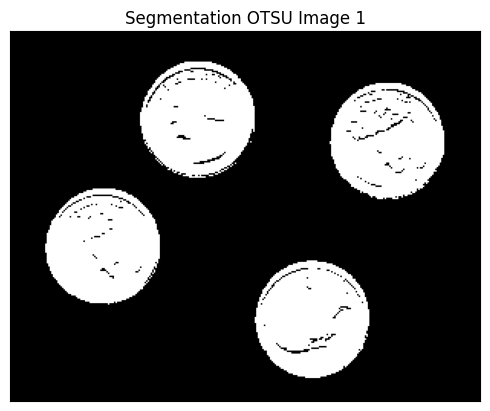

In [4]:
[_,mask1] = cv2.threshold(img1_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) # umbralización OTSU

# Visualización de la umbralización

plt.figure() # crear figura
plt.title('Segmentation OTSU Image 1') # título
plt.imshow(mask1, cmap = 'gray') # mostrar imagen
plt.xticks([]), plt.yticks([]) # eliminar ejes
plt.show() # mostrar imagen


We can see that it makes a correct distinction between the background and the coins, however, it takes a bit of the edges of the figures on the coins. To remove them, we will do a dilation iteration

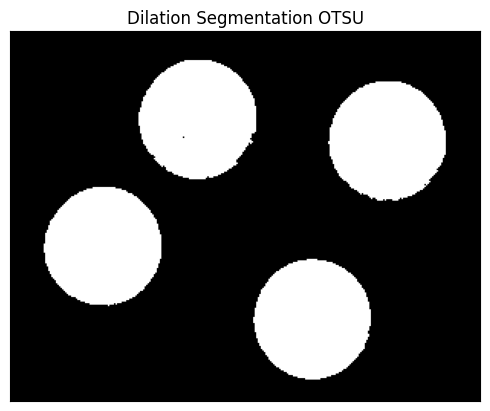

In [5]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)) # elemento estructurante circulo
img1_gray_dilate = cv2.dilate(mask1, kernel1, iterations = 1) # dilatación

# Mostrar umbralizaciôn con remoción de ruido
plt.figure() # crear figura
plt.title('Dilation Segmentation OTSU') # título
plt.imshow(img1_gray_dilate, cmap = 'gray') # mostrar imagen
plt.xticks([]), plt.yticks([]) # eliminar ejes
plt.show() # mostrar imagen

We can see that the edges disappeared but the radius of the coins increased considerably, so we will do an erosion iteration with the same structuring element to recover the original size of the coins

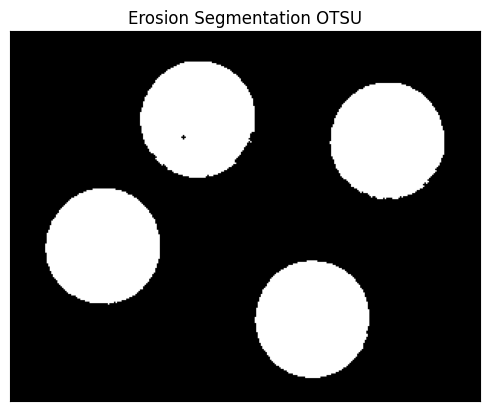

In [6]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)) # elemento estructurante circulo
img1_gray_erode = cv2.erode(img1_gray_dilate, kernel1, iterations = 1) # erosión

# Mostrar umbralizaciôn con remoción de ruido
plt.figure() # crear figura
plt.title('Erosion Segmentation OTSU') # título
plt.imshow(img1_gray_erode, cmap = 'gray') # mostrar imagen
plt.xticks([]), plt.yticks([]) # eliminar ejes
plt.show() # mostrar imagen

We can see that since the coins are separated, in this case it is not necessary to perform erosion to identify the objects. So we will proceed to count the objects or regions. You should identify 5 objects: the background and the 4 coins.

In [7]:
[cnt, img1_markers] = cv2.connectedComponents(img1_gray_erode)
print("Object count: ", cnt)


Object count:  5


Now we will visualize each of the objects with a different color

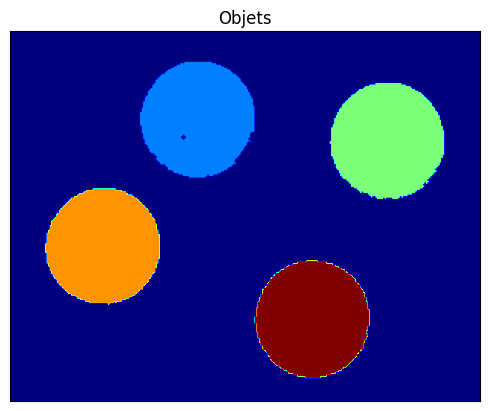

In [8]:
plt.figure() # crear figura
plt.title('Objets') # título
plt.imshow(img1_markers, cmap = 'jet') # mostrar imagen
plt.xticks([]), plt.yticks([]) # eliminar ejes
plt.show() # mostrar imagen

We will add the Shared Region

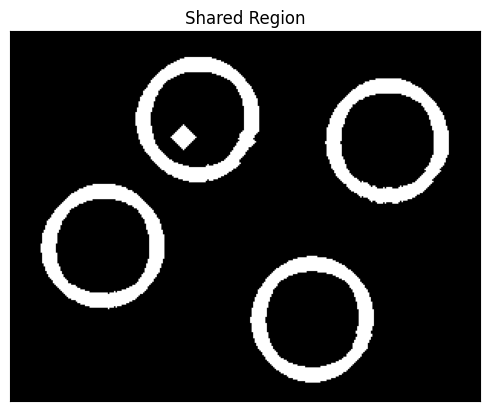

In [9]:
unknown = cv2.subtract(cv2.dilate(img1_gray_erode, kernel1, iterations=3), cv2.erode(img1_gray_erode, kernel1, iterations=7))

# Mostrar región compartida

plt.figure() # crear figura
plt.title('Shared Region') # título
plt.imshow(unknown, cmap = 'gray') # mostrar imagen
plt.xticks([]), plt.yticks([]) # eliminar ejes
plt.show() # mostrar imagen

Finally, we will perform the watershed segmentation

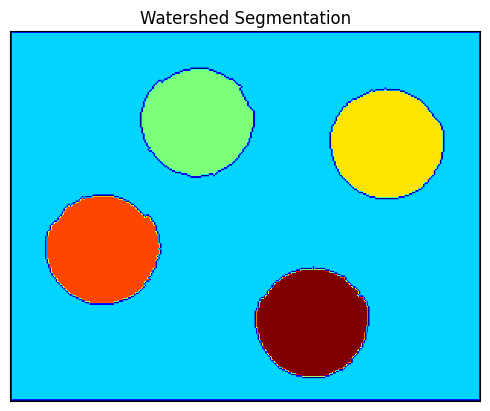

In [10]:
# Agregar región compartida
img1_markers = img1_markers + 1
img1_markers[unknown == 255] = 0

img1_watershed = cv2.watershed(img1_rgb, img1_markers)

# Visualizar
plt.figure() # crear figura
plt.title('Watershed Segmentation') # título
plt.imshow(img1_watershed - 1, cmap = 'jet') # mostrar imagen
plt.xticks([]), plt.yticks([]) # eliminar ejes
plt.show() # mostrar imagen

B) Perform color segmentation of only 2 objects from image 1 using the segmentation mask generated by the morphological Watershed method.

**Execution:**

We will segment object 1 and object 2


In [11]:
mask_obj1 = np.uint8(img1_watershed==2)
mask_obj2 = np.uint8(img1_watershed==3)

R, G, B = cv2.split(img1_rgb)

seg1_R = R*mask_obj1
seg1_G = G*mask_obj1
seg1_B = B*mask_obj1

seg2_R = R*mask_obj2
seg2_G = G*mask_obj2
seg2_B = B*mask_obj2

seg1 = cv2.merge((seg1_R, seg1_G, seg1_B))
seg2 = cv2.merge((seg2_R, seg2_G, seg2_B))

Now, we will show objects 1 and 2

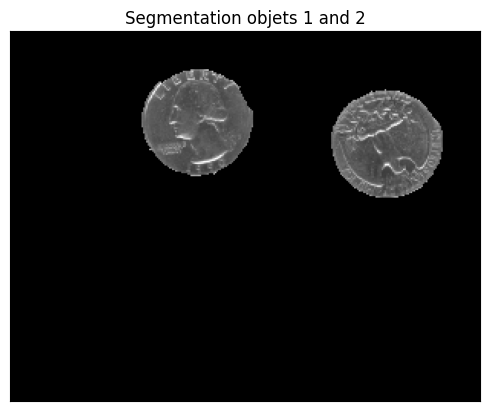

In [12]:
plt.figure() # crear figura
plt.title("Segmentation objets 1 and 2")
plt.imshow(seg1+seg2)
plt.xticks([]), plt.yticks([]) # eliminar ejes
plt.show() # mostrar imagen

C) Perform color segmentation of all objects in image 2 using the segmentation mask generated by the morphological Watershed method. Use OTSU thresholding and morphological filters for image preprocessing.

**Answer:**

We will start by doing a thresholding in OTSU of the gray image

In [13]:
[_,mask2] = cv2.threshold(img2_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

Show thresholding

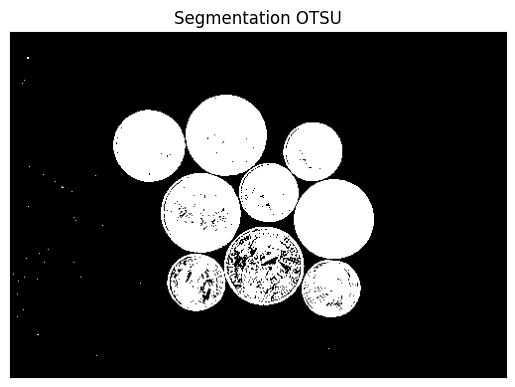

In [14]:
plt.figure()
plt.title('Segmentation OTSU')
plt.imshow(255-mask2, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

Noise removal from thresholding

In [15]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
img2_gray_opening = 255-cv2.morphologyEx(mask2,cv2.MORPH_OPEN, kernel1, iterations=3)

Filtered thresholfing

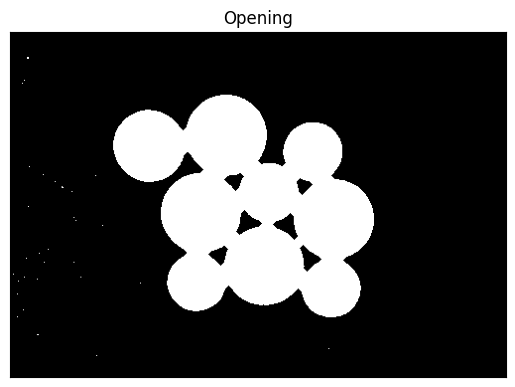

In [16]:
plt.figure()
plt.title('Opening')
plt.imshow(img2_gray_opening,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

Region detection

In [17]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
objects = cv2.erode(img2_gray_opening, kernel3, iterations=7)

Show objects

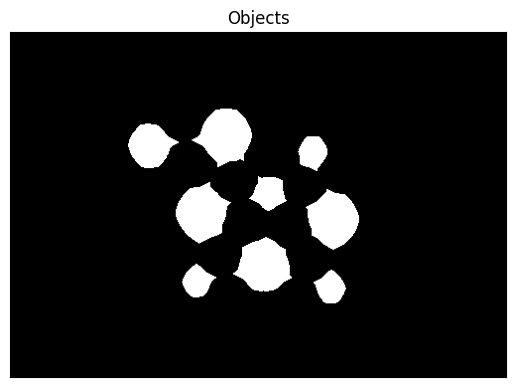

In [18]:
plt.figure()
plt.title('Objects')
plt.imshow(objects,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

Background detection

In [19]:
background = cv2.dilate(img2_gray_opening, kernel3, iterations=1)


Show background

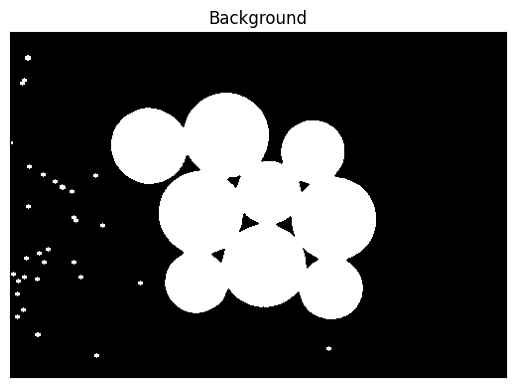

In [20]:
plt.figure()
plt.title('Background')
plt.imshow(background,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

Detect shared region

In [21]:
unknown = cv2.subtract(background,objects)

Show shared region

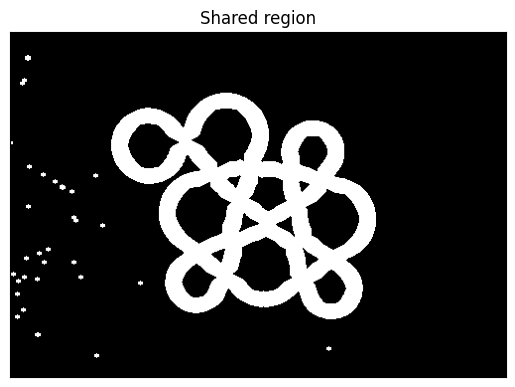

In [22]:
plt.figure()
plt.title('Shared region')
plt.imshow(unknown,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()


Object or region count

In [23]:
[cnt, markers2] = cv2.connectedComponents(objects)
print("Object/Region count: ", cnt)

Object/Region count:  10


Show separated objects

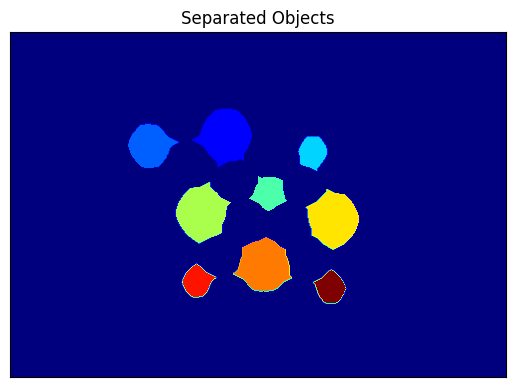

In [24]:
plt.figure()
plt.title('Separated Objects')
plt.imshow(markers2,cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()

Add shared region

In [25]:
markers2 = markers2 + 1
markers2[unknown==255] = 0

Show background, objects and shared region

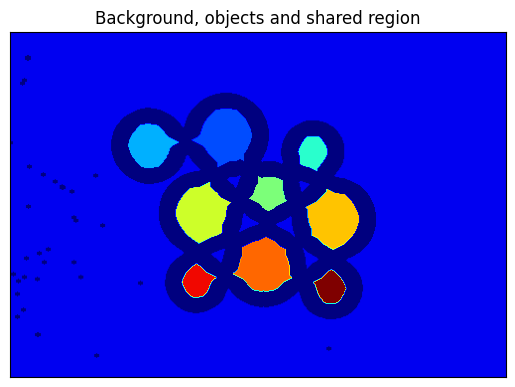

In [26]:
plt.figure()
plt.title('Background, objects and shared region')
plt.imshow(markers2,cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()

Watershed segmentation

In [27]:
img2_watershed = cv2.watershed(img2_rgb, markers2)
img2_watershed = img2_watershed - 1

Show background, objects and shared region

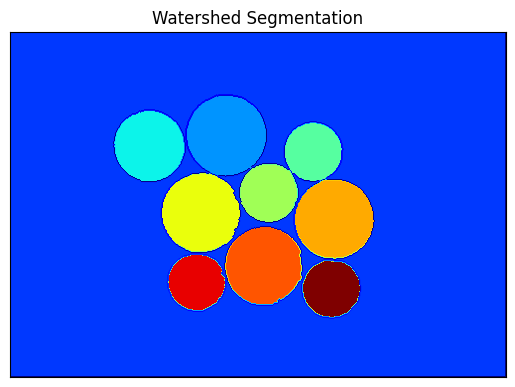

In [28]:
plt.figure()
plt.title('Watershed Segmentation')
plt.imshow(img2_watershed, cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()

D) Perform color segmentation of only 4 objects from image 2 using the segmentation mask generated by the morphological Watershed method.

**Answer:**

We will segment objects 1,2,3 and 4



In [29]:
mask2_obj1 = np.uint8(img2_watershed==1)
mask2_obj2 = np.uint8(img2_watershed==2)
mask2_obj3 = np.uint8(img2_watershed==3)
mask2_obj4 = np.uint8(img2_watershed==4)

R, G, B = cv2.split(img2_rgb)

seg1_R = R*mask2_obj1
seg1_G = G*mask2_obj1
seg1_B = B*mask2_obj1

seg2_R = R*mask2_obj2
seg2_G = G*mask2_obj2
seg2_B = B*mask2_obj2

seg3_R = R*mask2_obj3
seg3_G = G*mask2_obj3
seg3_B = B*mask2_obj3

seg4_R = R*mask2_obj4
seg4_G = G*mask2_obj4
seg4_B = B*mask2_obj4

seg1 = cv2.merge((seg1_R, seg1_G, seg1_B))
seg2 = cv2.merge((seg2_R, seg2_G, seg2_B))
seg3 = cv2.merge((seg3_R, seg3_G, seg3_B))
seg4 = cv2.merge((seg4_R, seg4_G, seg4_B))

Now, we will show objects 1,2,3 and 4

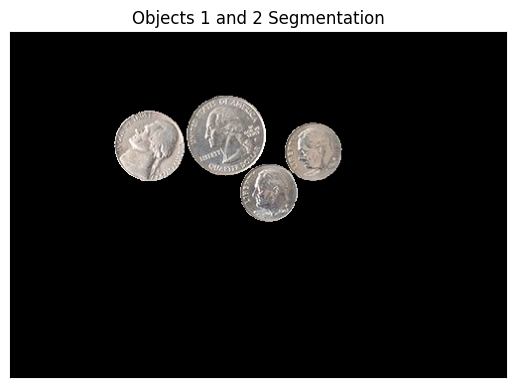

In [30]:
plt.figure() # crear figura
plt.title("Objects 1 and 2 Segmentation")
plt.imshow(seg1+seg2+seg3+seg4)
plt.xticks([]), plt.yticks([]) # eliminar ejes
plt.show() # mostrar imagen

**SEGMENTATION EVALUATION**

A) Perform the evaluation (IoU) of the segmentation mask generated by the morphological Watershed method of image 1 using the provided manual segmentation mask.

**Answer:**

We take the manual segmentation mask in gray and pass it through the thresholder

In [31]:
img1_mask_gray = cv2.cvtColor(img1_mask,cv2.COLOR_BGR2GRAY)
[_, mask1_manual] = cv2.threshold(img1_mask_gray,0,1,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

We pass the segmentation by watershed through the thresholdizer

In [32]:
img1_mask_watershed = np.uint8(img1_watershed > 1)
[_, mask1_watershed] = cv2.threshold(img1_mask_watershed,0,1,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

Watershed segmentation vs manual mask

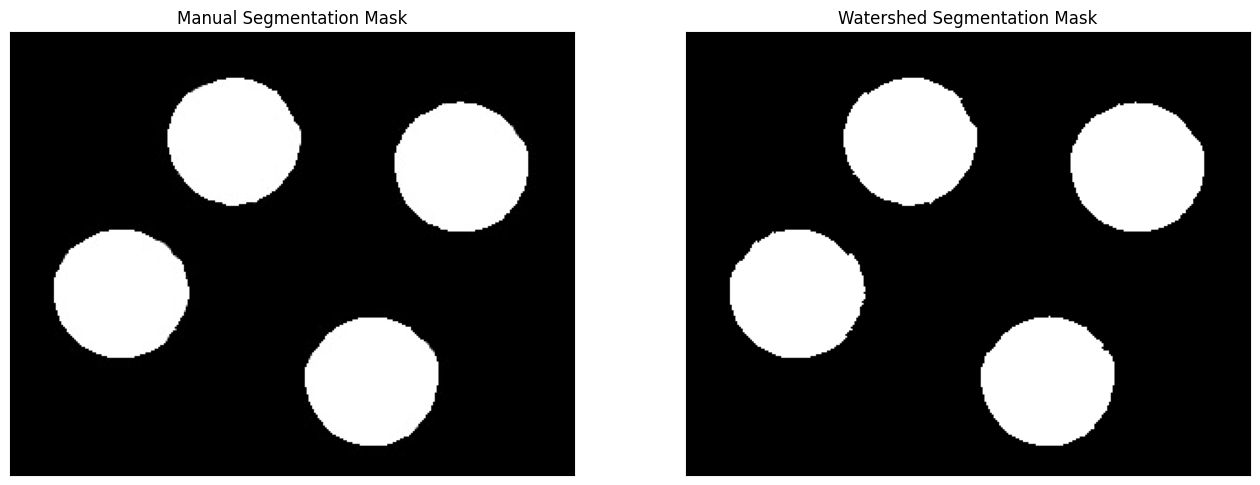

In [33]:
plt.figure(figsize=(16,8))

plt.subplot(121) # Locate image
plt.title('Manual Segmentation Mask') # Title
plt.imshow(img1_mask_gray, cmap='gray') # Show image
plt.xticks([]), plt.yticks([]) # Eliminate axis

plt.subplot(122)
plt.title('Watershed Segmentation Mask')
plt.imshow(img1_mask_watershed, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show() # Show images

Find Jaccard index of the segmentation mask generated by Watershed from image 1

In [34]:
J = jaccard_score(mask1_manual, mask1_watershed,average='micro')
print("Jaccard Index:", J*100, "%")

Jaccard Index: 99.41911305434104 %


B) Perform the evaluation (IoU) of the segmentation mask generated by the morphological Watershed method of image 2 using the provided manual segmentation mask.

**Answer:**

We take the manual segmentation mask in gray and pass it through the thresholder

In [35]:
img2_mask_gray = cv2.cvtColor(img2_mask,cv2.COLOR_BGR2GRAY)
[_, mask2_manual] = cv2.threshold(img2_mask_gray,0,1,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

We pass the segmentation by watershed through the thresholdizer

In [36]:
img2_mask_watershed = np.uint8(img2_watershed > 0)
[_, mask2_watershed] = cv2.threshold(img2_mask_watershed,0,1,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

View manual mask and mask generated with watershed

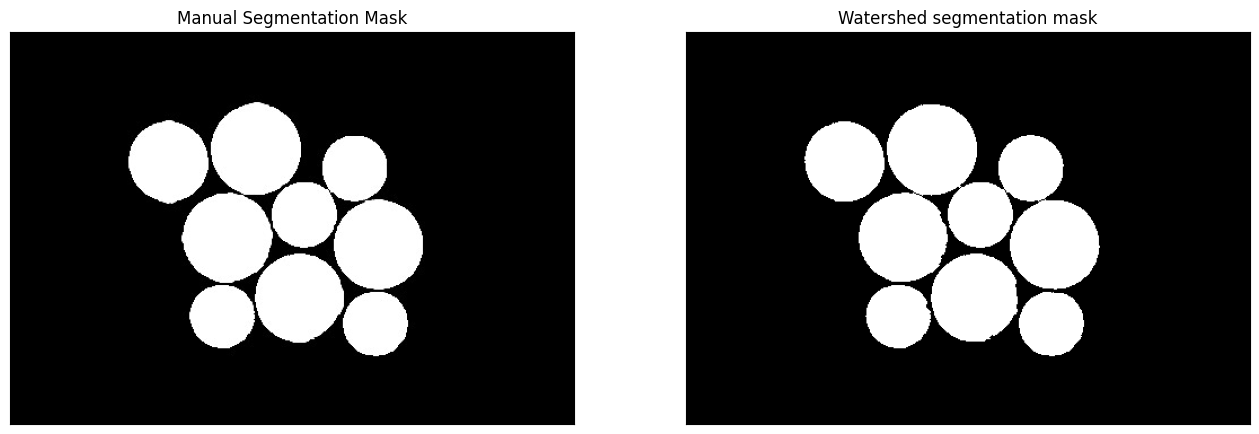

In [37]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.title('Manual Segmentation Mask')
plt.imshow(img2_mask_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('Watershed segmentation mask')
plt.imshow(img2_mask_watershed, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

Find Jaccard index of the segmentation mask generated by Watershed from image 1

In [38]:
J = jaccard_score(mask2_manual, mask2_watershed,average='micro')
print("Jaccard Index:", J*100, "%")

Jaccard Index: 99.20331514284881 %


C) Perform evaluation (IoU) of the segmentation mask generated by the OTSU thresholding method of image 1 using the provided manual segmentation mask

View manual mask and mask generated with OTSU

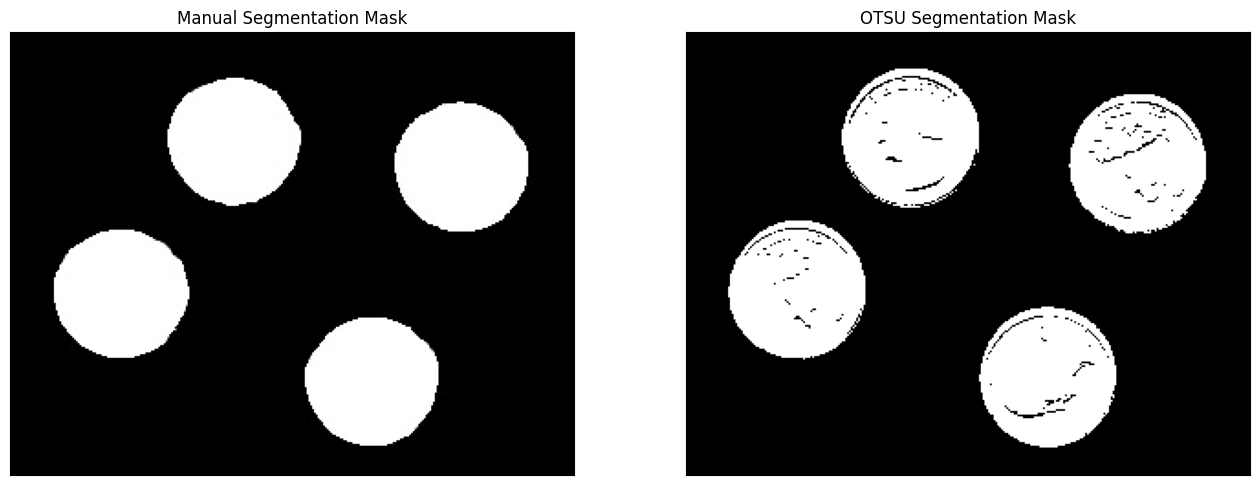

In [39]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.title('Manual Segmentation Mask')
plt.imshow(img1_mask_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('OTSU Segmentation Mask')
plt.imshow(mask1, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

Find Jaccard index of the segmentation mask generated by Watershed from image 1

In [40]:
J = jaccard_score(mask1_manual, mask1,average='micro')
print("Jaccard Index:", J*100, "%")

Jaccard Index: 87.94080961560267 %


D) Perform the evaluation (IoU) of the segmentation mask generated by the k-means clustering method (k=2) of image 1 using the provided manual segmentation mask

We start by generating the k-means segmentation with k = 2

In [41]:
K1 = 2
Z1 = img2_gray.reshape((-1,3))
Z1 = np.float32(Z1)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
[_, label1, center1] = cv2.kmeans(Z1, K1, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

Define the centers

In [42]:
center1 = np.uint8(center1)
center_mask2 = center1[label1.flatten()]
mask2_kmeans1 = center_mask2.reshape((img2_gray.shape))

We pass the k-means segmentation through the thresholdizer

In [43]:
img2_mask_kmeans = np.uint8(mask2_kmeans1)
[_, mask2_kmeans] = cv2.threshold(img2_mask_kmeans,0,1,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

Manual mask vs K-means Mask

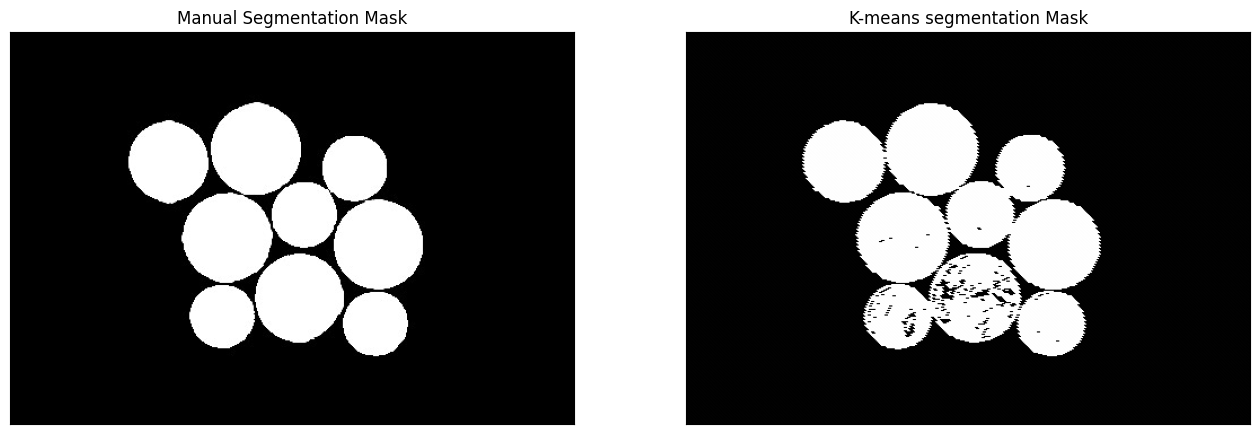

In [44]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.title('Manual Segmentation Mask')
plt.imshow(img2_mask_gray, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title('K-means segmentation Mask')
plt.imshow(mask2_kmeans1, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

Find Jaccard index of the segmentation mask generated by kmeans from image 2

In [45]:
J = jaccard_score(mask2_manual, mask2_kmeans,average='micro')
print("Jaccard Score:", J*100, "%")

Jaccard Score: 92.65822784810128 %
